In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
label = train['Survived']
label.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

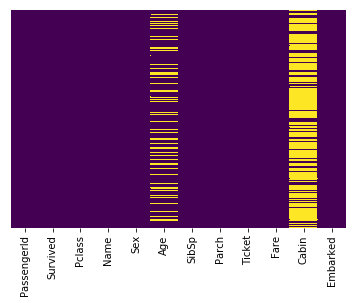

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

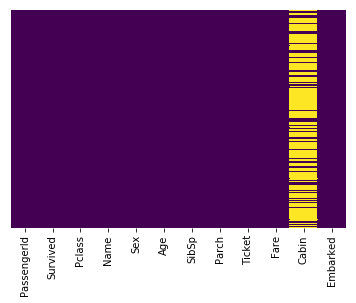

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
sex = pd.get_dummies(train['Sex'], drop_first='True')
embark = pd.get_dummies(train['Embarked'], drop_first='True')

In [11]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1, inplace=True)

In [12]:
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [13]:
train = pd.concat([train, sex, embark], axis=1)

In [14]:
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


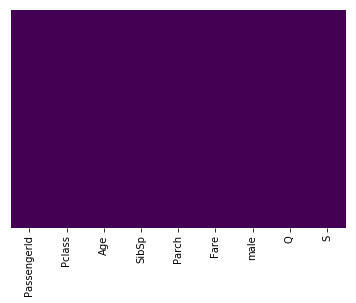

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.3, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
predictions = clf.predict(X_test)

In [30]:
print (predictions)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]


In [33]:
print(clf.score(X_test, y_test))

0.8022388059701493


In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

   micro avg       0.80      0.80      0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [45]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


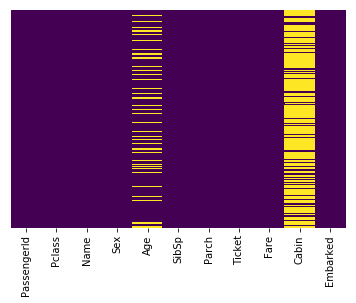

In [46]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
t_sex = pd.get_dummies(test['Sex'], drop_first='True')
t_embark = pd.get_dummies(test['Embarked'], drop_first='True')

KeyError: 'Sex'

In [49]:
test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [51]:
test = pd.concat([test, t_sex, t_embark], axis=1)

In [60]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


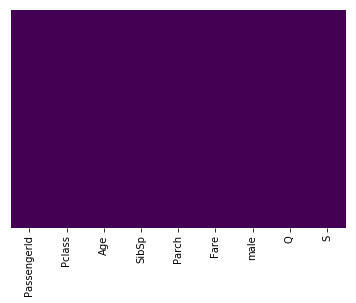

In [53]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [88]:
test['Fare'][152:153] = np.mean(test['Fare'])
test['Fare'][152:153]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


152    35.627188
Name: Fare, dtype: float64

In [90]:
prediction = clf.predict(test)

In [99]:
solution_data = {'PassengerId' : test['PassengerId'], 'Survived' : prediction}

In [105]:
Solution = pd.DataFrame(solution_data)

In [106]:
Solution.to_csv('Submission.csv', index=False)

In [107]:
Solution.count()

PassengerId    418
Survived       418
dtype: int64